In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from IPython.display import HTML
import matplotlib
import matplotlib.animation as animation
matplotlib.rcParams['animation.embed_limit'] =1e12
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# #Gustavo's default KHTH=500
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH2000
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00032002.nc',decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

##Parameterized GME runs
# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C01
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C1
# %ls
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_default
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)


# #Original baseline cases:
# %cd /glade/p/univ/unyu0004/eyankovsky/baseline_0.5degree
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_dataset('ocean.stats.nc', decode_times=False)
# av = xr.open_dataset('averages_00031502.nc', decode_times=False)

# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_dataset('ocean.stats.nc', decode_times=False)
# av = xr.open_dataset('averages_00026002.nc', decode_times=False)
# %ls
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_dataset('ocean.stats.nc', decode_times=False)
# av = xr.open_dataset('averages_00006002.nc', decode_times=False)

#MEKE GM + BS with biharmonic viscosity:
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_default
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
av = xr.open_dataset('averages_00031502.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_default
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
av = av.astype(np.float64) #to avoid roundoff errors with time averaging thicknesses
print(av.h)

<xarray.DataArray 'h' (time: 100, zl: 15, yh: 280, xh: 120)>
array([[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan, 1.00000341e-10, 1.00001077e-10, ...,
          1.00094801e-10, 1.00000029e-10,            nan],
         [           nan, 1.00173959e-10, 1.00075358e-10, ...,
          1.00041586e-10, 1.00000001e-10,            nan],
         ...,
         [           nan, 2.61251908e-03, 4.28322628e-02, ...,
          5.77052355e-01, 6.60637319e-01,            nan],
         [           nan, 1.70573853e-02, 3.22712585e-03, ...,
          1.15700603e+00, 6.55414462e-01,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan, 1.00000341e-10, 1.00001077e-10, ...,
      

In [4]:
eta = av.h.sum(dim='zl') - fs.depth_ocean
eta_mean = eta.mean(dim='time')
eta_prime=eta-eta_mean
xh = av.h.xh
yh = av.h.yh

In [25]:
# fig = plt.figure(figsize=(5, 8), dpi= 120, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
# ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])

# ax1.set_xlabel('Longitude',fontsize=16); ax1.set_ylabel('Latitude',fontsize=16)
# ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

# quad1=ax1.pcolormesh(xh,yh,eta_prime.mean('time'),cmap='RdBu_r',vmin=-.005,vmax=.005,shading='goaround')
# cb1 = fig.colorbar(quad1,ax2)
# ax1.set_title('SSH, time mean', fontsize=14)
# ax1.set_aspect('equal')
# ax2.set_title('m', fontsize=14)



/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/halfdeg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


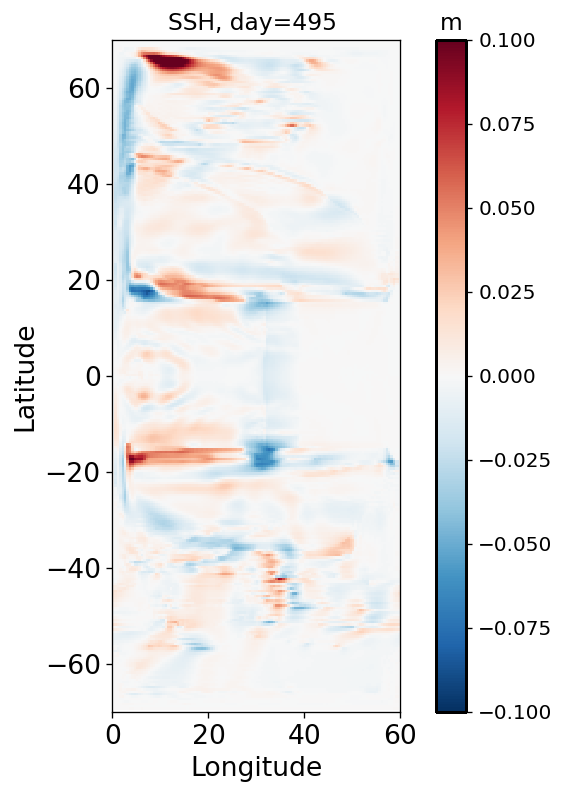

In [5]:
fig = plt.figure(figsize=(5, 8), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])

ax1.set_xlabel('Longitude',fontsize=16); ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
%mkdir /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/halfdeg
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/halfdeg
for i in range(0,100):
    print(i)
    quad1=ax1.pcolormesh(xh,yh,np.array(eta_prime[i,:,:]),cmap='RdBu_r',vmin=-.1,vmax=.1,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    ax1.set_title('SSH, day=%i ' %(i*5), fontsize=14)
    ax1.set_aspect('equal')
    ax2.set_title('m', fontsize=14)
    plt.savefig('index%.3d'%i)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/



/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/halfdegN
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


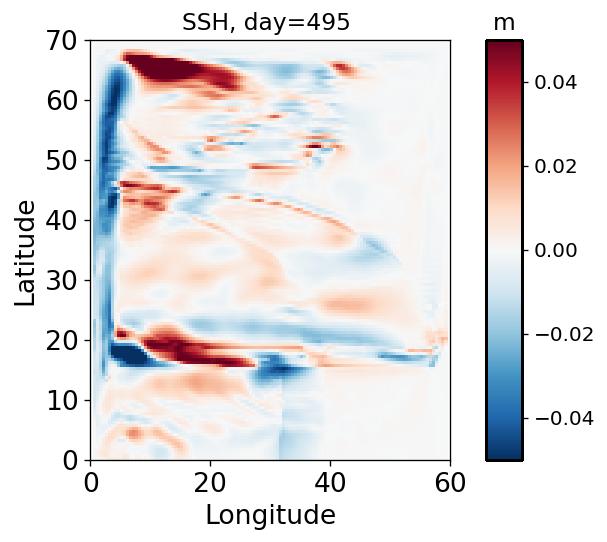

In [6]:
fig = plt.figure(figsize=(6, 5), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.12,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.12, 0.05, 0.7])

ax1.set_xlabel('Longitude',fontsize=16); ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
%mkdir /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/halfdegN
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/halfdegN
for i in range(0,100):
    print(i)
    quad1=ax1.pcolormesh(xh,yh,np.array(eta_prime[i,:,:]),cmap='RdBu_r',vmin=-.05,vmax=.05,shading='goaround')
    ax1.set_ylim([0,70])
    cb1 = fig.colorbar(quad1,ax2)
    ax1.set_title('SSH, day=%i ' %(i*5), fontsize=14)
    ax1.set_aspect('equal')
    ax2.set_title('m', fontsize=14)
    plt.savefig('index%.3d'%i)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/